### AMZN Correlation
Perform CA For AMZN

In [20]:
# Enables automatic reloading of modules when they change and allows importing from the parent directory.
'''
Allow importing custom modules from the parent directory.
Ensure that any changes to those modules (e.g., editing a .py file in the parent directory) 
are automatically reloaded when you run cells, making development and testing more efficient.
'''

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(".."))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from scripts.correlation_analysis import ( load_data, analyze_sentiment, sentiment_distribution_plot
                                          , daily_returns,plot_daily_returns, daily_sentiment_and_merge
                                          ,plot_sentiment_and_daily_return_correlation, correlation_heatmap)

In [22]:
# Load the news and stock data
# Ensure the paths are correct relative to the current working directory
news_data = '../Data/raw_analyst_ratings.csv'
stock_data = '../Data/AMZN_historical_data.csv'


1. Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates. This might involve normalizing timestamps.

In [23]:
#Align the news and stock data
aligned_data = load_data(news_data, stock_data)

In [24]:
# Display the first few rows of the aligned data
aligned_data.head(10)


,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0


2. Sentiment Analysis: Conduct sentiment analysis on news headlines

In [25]:
# Perform sentiment analysis on the 'headline' column of the aligned data
analyze_sentiment(aligned_data, 'headline')  
aligned_data.head(10)

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.00


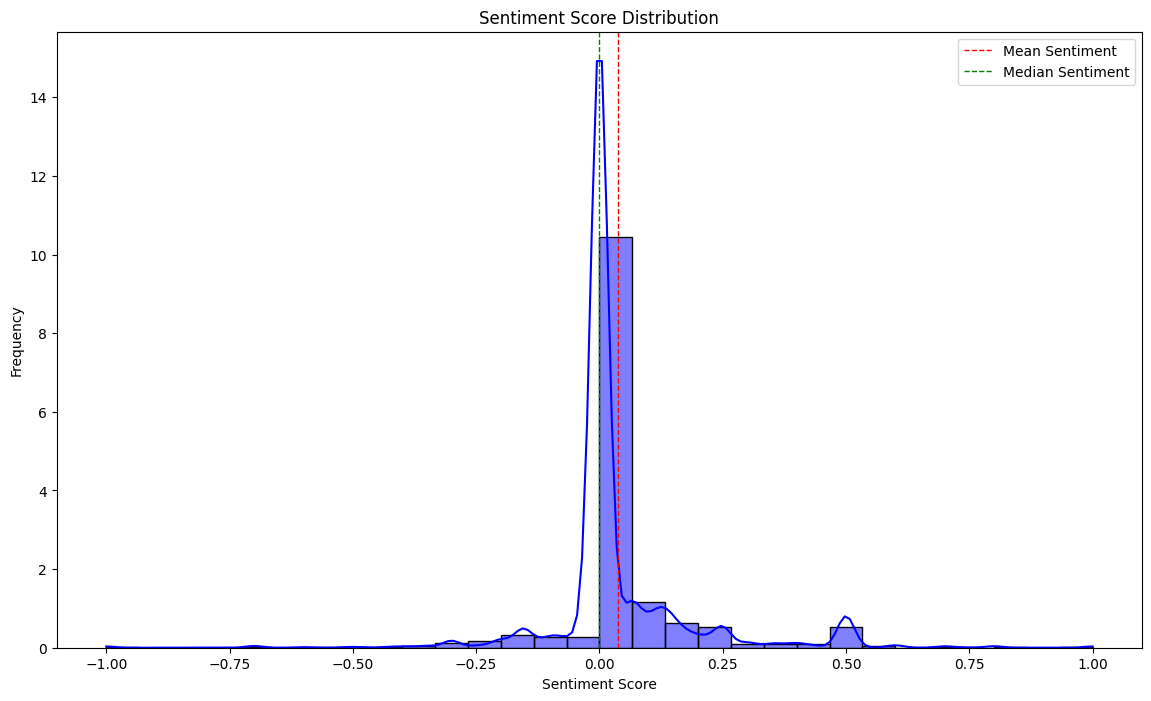

In [26]:
# Perform sentiment distribution plot
sentiment_distribution_plot(aligned_data)

In [27]:
# Calculate daily returns for the stock data
daily_returns(aligned_data)
# Drop rows with NaN values in the 'headline' or 'date' columns
aligned_data = aligned_data.dropna()
# Display the first few rows of the aligned data with daily returns
print(aligned_data[['date', 'Close', 'daily_return']].head())



          date       Close  daily_return
7   2020-05-22  121.844002      0.000000
8   2020-05-22  121.844002      0.000000
10  2020-06-09  130.042999      0.067291
11  2020-06-08  126.203003     -0.029529
12  2020-06-08  126.203003      0.000000


3. Calculate Daily Stock Returns: Compute the percentage change in daily closing prices to represent stock movements

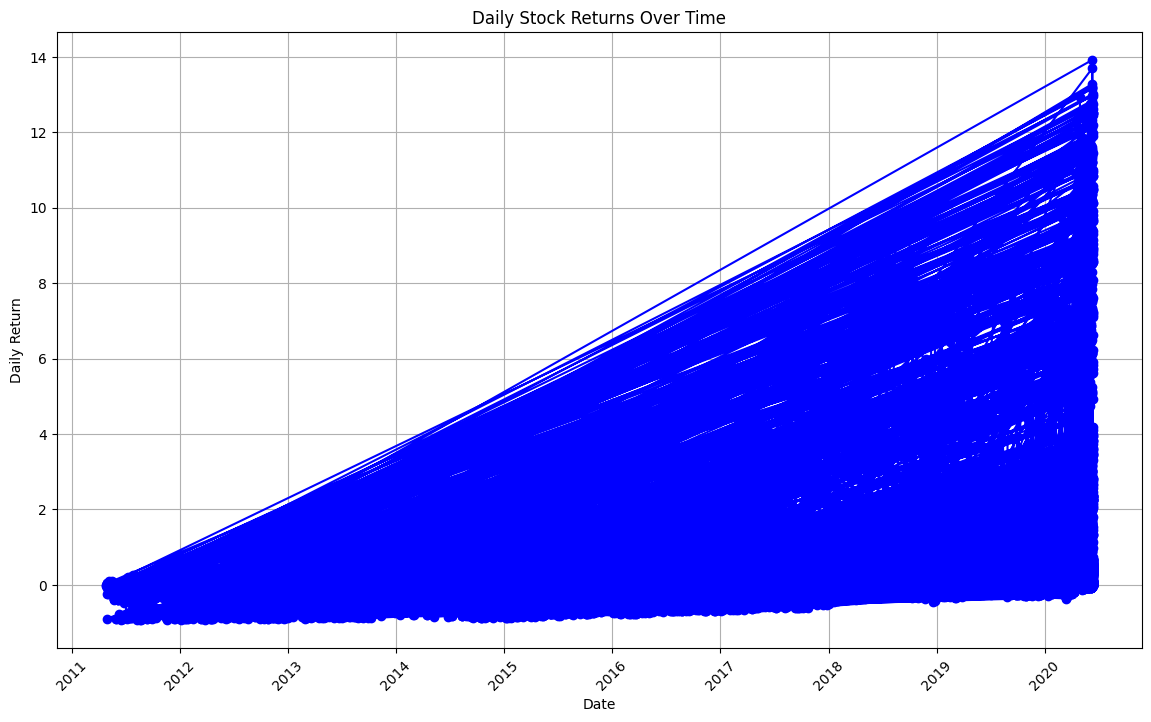

In [28]:
# Plot daily returns
plot_daily_returns(aligned_data)

In [29]:
daily_sentiment_and_merge(aligned_data )

,date,sentiment,daily_return
0,2011-04-28,0.068182,-0.012804
1,2011-04-28,0.068182,-0.018763
2,2011-04-29,0.166667,-0.012855
3,2011-04-29,0.166667,-0.896206
4,2011-05-02,-0.020833,-0.069340
...,...,...,...
27984,2020-06-11,0.012137,0.606365
27985,2020-06-11,0.012137,0.000000
27986,2020-06-11,0.012137,0.473776
27987,2020-06-11,0.012137,0.000000


In [30]:
# Calculate daily sentiment and merge with stock data
merged_data = daily_sentiment_and_merge(aligned_data )
merged_data.head(10)    

,date,sentiment,daily_return
0,2011-04-28,0.068182,-0.012804
1,2011-04-28,0.068182,-0.018763
2,2011-04-29,0.166667,-0.012855
3,2011-04-29,0.166667,-0.896206
4,2011-05-02,-0.020833,-0.069340
5,2011-05-02,-0.020833,0.047047
6,2011-05-02,-0.020833,-0.231571
7,2011-05-02,-0.020833,0.039473
8,2011-05-05,0.000000,-0.229045
9,2011-05-06,0.250000,-0.083275


4. Correlation Analysis: Use statistical methods to test the correlation between daily news sentiment scores and stock returns.

In [31]:
# Calculate the correlation between daily sentiment scores and stock returns
correlation = merged_data['sentiment'].corr( merged_data['daily_return'])
print("Correlation between daily sentiment scores and stock returns:", correlation)

Correlation between daily sentiment scores and stock returns: -0.03556910467393701


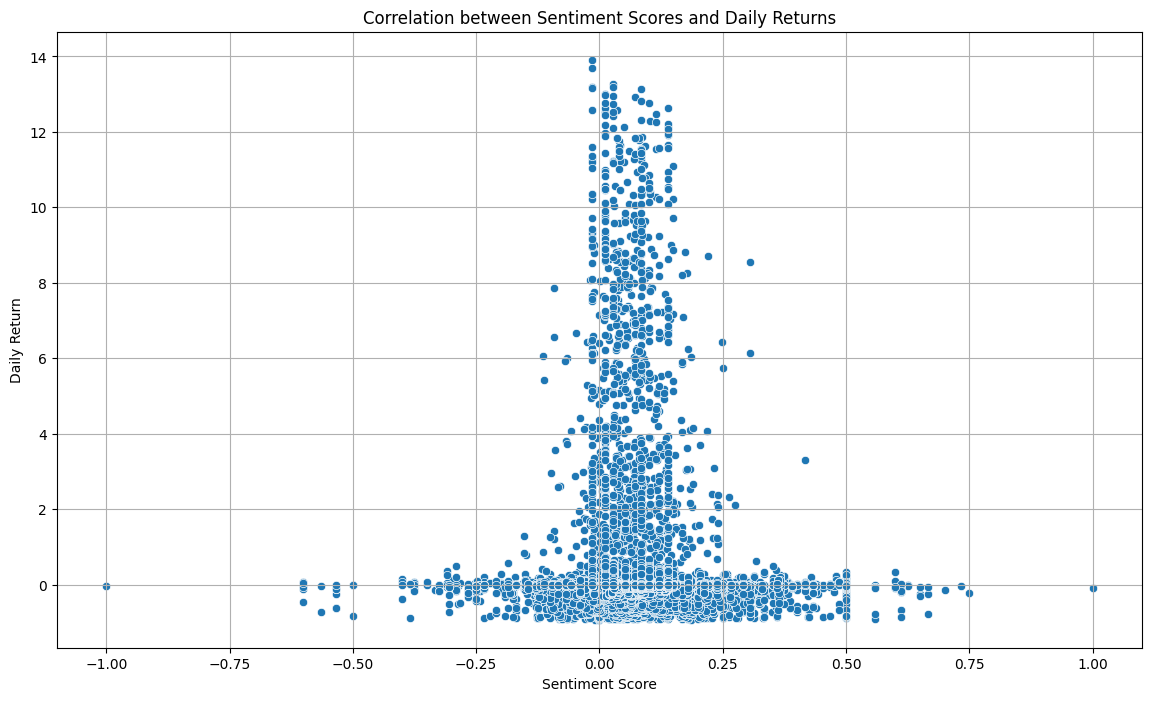

In [32]:
# Function to plot sentiment and daily return correlation
plot_sentiment_and_daily_return_correlation(merged_data)

In [33]:
# Calculate the correlation matrix between sentiment and daily returns
correlation_matrix = merged_data[['sentiment', 'daily_return']].corr()


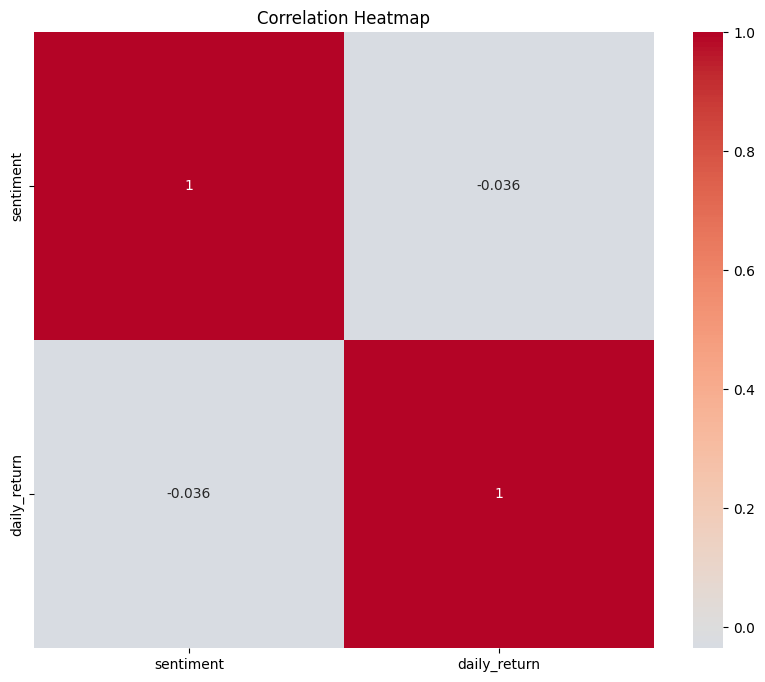

In [34]:
# Function to plot the correlation heatmap

correlation_heatmap(correlation_matrix)